In [1]:
### Python Notebook With Functions To Load EFS-format Seismic Waveform Files
#   Daniel Trugman, 2020
#   Adapted from functions written by R. Matoza

In [2]:
### Import Statements ###
import numpy as np
import matplotlib.pyplot as plt
import struct

In [3]:
###### Class Definition: EFS File ####
class EFS():
    
    '''
    Class definition for EFS-format data.
    Basic initialization syntax: edata = EFS("path_to_efs_file").
    '''
    
    ### --- Initialization --- ###
    def __init__(self,efsfname):
        
        # Open the EFS binary file
        f = open(efsfname, 'rb')

        # Assemble file header
        self.fhead = {}
        self.fhead['bytetype'] = struct.unpack('i', f.read(4))[0]
        self.fhead['eheadtype'] = struct.unpack('i', f.read(4))[0]
        self.fhead['nbytes_ehead'] = struct.unpack('i', f.read(4))[0]
        self.fhead['tsheadtype'] = struct.unpack('i', f.read(4))[0]
        self.fhead['nbytes_tshead'] = struct.unpack('i', f.read(4))[0]

        # Assemble event header
        self.ehead={}
        self.ehead['efslabel'] = f.read(40).decode('UTF-8')
        self.ehead['datasource'] = f.read(40).decode('UTF-8')
        self.ehead['maxnumts'] = struct.unpack('i', f.read(4))[0]
        self.ehead['numts'] = struct.unpack('i', f.read(4))[0]
        self.ehead['cuspid'] = struct.unpack('i', f.read(4))[0]
        self.ehead['qtype'] = f.read(4).decode('UTF-8')
        self.ehead['qmag1type'] = f.read(4).decode('UTF-8')
        self.ehead['qmag2type'] = f.read(4).decode('UTF-8')
        self.ehead['qmag3type'] = f.read(4).decode('UTF-8')
        self.ehead['qmomenttype'] = f.read(4).decode('UTF-8')
        self.ehead['qlocqual'] = f.read(4).decode('UTF-8')
        self.ehead['qfocalqual'] = f.read(4).decode('UTF-8')
        self.ehead['qlat'] = struct.unpack('f', f.read(4))[0]
        self.ehead['qlon'] = struct.unpack('f', f.read(4))[0]
        self.ehead['qdep'] = struct.unpack('f', f.read(4))[0]
        self.ehead['qsc'] = struct.unpack('f', f.read(4))[0]
        self.ehead['qmag1'] = struct.unpack('f', f.read(4))[0]
        self.ehead['qmag2'] = struct.unpack('f', f.read(4))[0]
        self.ehead['qmag3'] = struct.unpack('f', f.read(4))[0]
        self.ehead['qmoment'] = struct.unpack('f', f.read(4))[0]
        self.ehead['qstrike'] = struct.unpack('f', f.read(4))[0]
        self.ehead['qdip'] = struct.unpack('f', f.read(4))[0]
        self.ehead['qrake'] = struct.unpack('f', f.read(4))[0]
        self.ehead['qyr'] = struct.unpack('i', f.read(4))[0]
        self.ehead['qmon'] = struct.unpack('i', f.read(4))[0]
        self.ehead['qdy'] = struct.unpack('i', f.read(4))[0]
        self.ehead['qhr'] = struct.unpack('i', f.read(4))[0]
        self.ehead['qmn'] = struct.unpack('i', f.read(4))[0]

        # 20 4-byte fields reserved for future uses - skip
        for idum in range(0,20):
            dummy = struct.unpack('i', f.read(4))[0]

        # Get byte positions for all time series
        bytepos = np.fromfile(f, dtype=np.int32, count=self.ehead['numts'])

        # Now loop over all the time series
        self.waveforms = [] # list to store time series
        for ii in range(0, len(bytepos)):

            # Assemble tshead
            tshead={}
            f.seek(bytepos[ii])
            tshead['stname'] = f.read(8).decode('UTF-8')
            tshead['loccode'] = f.read(8).decode('UTF-8')
            tshead['datasource'] = f.read(8).decode('UTF-8')
            tshead['sensor'] = f.read(8).decode('UTF-8')
            tshead['units'] = f.read(8).decode('UTF-8')
            tshead['chnm'] = f.read(4).decode('UTF-8')
            tshead['stype'] = f.read(4).decode('UTF-8')
            tshead['dva'] = f.read(4).decode('UTF-8')
            tshead['pick1q'] = f.read(4).decode('UTF-8')
            tshead['pick2q'] = f.read(4).decode('UTF-8')
            tshead['pick3q'] = f.read(4).decode('UTF-8')
            tshead['pick4q'] = f.read(4).decode('UTF-8')
            tshead['pick1name'] = f.read(4).decode('UTF-8')
            tshead['pick2name'] = f.read(4).decode('UTF-8')
            tshead['pick3name'] = f.read(4).decode('UTF-8')
            tshead['pick4name'] = f.read(4).decode('UTF-8')
            tshead['ppolarity'] = f.read(4).decode('UTF-8')
            tshead['problem'] = f.read(4).decode('UTF-8')
            tshead['npts'] = struct.unpack('i', f.read(4))[0]
            tshead['syr'] = struct.unpack('i', f.read(4))[0]
            tshead['smon'] = struct.unpack('i', f.read(4))[0]
            tshead['sdy'] = struct.unpack('i', f.read(4))[0]
            tshead['shr'] = struct.unpack('i', f.read(4))[0]
            tshead['smn'] = struct.unpack('i', f.read(4))[0]
            tshead['compazi'] = struct.unpack('f', f.read(4))[0]
            tshead['compang'] = struct.unpack('f', f.read(4))[0]
            tshead['gain'] = struct.unpack('f', f.read(4))[0]
            tshead['f1'] = struct.unpack('f', f.read(4))[0]
            tshead['f2'] = struct.unpack('f', f.read(4))[0]
            tshead['dt'] = struct.unpack('f', f.read(4))[0]
            tshead['ssc'] = struct.unpack('f', f.read(4))[0]
            tshead['tdif'] = struct.unpack('f', f.read(4))[0]
            tshead['slat'] = struct.unpack('f', f.read(4))[0]
            tshead['slon'] = struct.unpack('f', f.read(4))[0]
            tshead['selev'] = struct.unpack('f', f.read(4))[0]
            tshead['deldist'] = struct.unpack('f', f.read(4))[0]
            tshead['sazi'] = struct.unpack('f', f.read(4))[0]
            tshead['qazi'] = struct.unpack('f', f.read(4))[0]
            tshead['pick1'] = struct.unpack('f', f.read(4))[0]
            tshead['pick2'] = struct.unpack('f', f.read(4))[0]
            tshead['pick3'] = struct.unpack('f', f.read(4))[0]
            tshead['pick4'] = struct.unpack('f', f.read(4))[0]

            # 20 4-byte fields reserved for future uses - skip
            for idum in range(0,20):
                dummy = struct.unpack('i', f.read(4))[0]

            # Read the time-series itself
            data = np.fromfile(f, dtype='<f4', count=tshead['npts']) # little-endian float32

            # Bundle tsheader and time-series for this waveform into efsdata, then append to list
            efsdata = tshead
            efsdata['data'] = data
            self.waveforms.append(efsdata)

    ###########################################################
    
    
    ### Function to convert to obspy Stream
    def to_obspy(self,keep_evdata=True,keep_stdata=True,keep_pkdata=True):
        
        '''
        Function to return obspy stream from EFS.
        Optional arguments preserve event, station, pick information in the 
        stats dictionary for each trace.
        '''
        
        # Error checking
        try:
            from obspy.core import Stream, Trace, UTCDateTime
        except:
            print('EFS.to_obspy() is not available. ObsPy is not installed.')
            raise
        
        # Initialize stream
        st = Stream()
        
        # Optional: preserve event information in header
        if keep_evdata:
            evdata = {}
            evdata['evid'] = self.ehead['cuspid']
            for key in ['qlat','qlon','qdep','qstrike','qdip','qrake']:
                if self.ehead[key] != -99.0:
                    evdata[key] = np.round(self.ehead[key],6)
            for imag in range(1,4):
                key1, key2 = 'qmag{:}'.format(imag),'qmag{:}type'.format(imag)
                if (self.ehead[key1]!=0.0) or (self.ehead[key2]!='    '):
                    evdata[key1] = np.round(self.ehead[key1],3)
                    evdata[key2] = self.ehead[key2].strip()
        
        # Loop over time
        for i, wf in enumerate(self.waveforms):
            
            # Initialize stats for trace
            stats = {}

            # Assemble mandatory header information
            stats['delta'] = wf['dt']
            stats['sampling_rate'] = 1/wf['dt']
            if wf['gain'] > 0:
                stats['calib']=wf['gain']
            else:
                stats['calib']=1.0
            stats['npts'] = wf['npts']
            stats['network'] = wf['stype'].strip()
            stats['station'] = wf['stname'].strip()
            stats['location'] = wf['loccode'].strip()
            if stats['location'] =='--': 
                stats['location']=''
            stats['channel'] = wf['chnm'].strip()
            stats['starttime'] = UTCDateTime(wf['syr'],wf['smon'],wf['sdy'],
                                            wf['shr'],wf['smn'],np.round(wf['ssc'],5))
            

            # Optional: preserve event information in header
            if keep_evdata:
                stats['event_data'] = evdata
                        
            
            # Optional: preserve station information in header
            if keep_stdata:
                stats['station_data']={}
                for key in ['compazi','compang','deldist','sazi','qazi','slat','slon','selev']:
                    if wf[key] != -99.0:
                        stats['station_data'][key] = np.round(wf[key],6)
                
            
            # Optional: preserve pick information in header
            if keep_pkdata:
                stats['pick_data']={}
                stats['pick_data']['tdif']=np.round(wf['tdif'],6)
                stats['pick_data']['ppolarity']=wf['ppolarity'].strip()
                for ipick in range(1,5):
                    key1 = 'pick{:}'.format(ipick)
                    if wf[key1] > 0:
                        key2, key3 = 'pick{:}name'.format(ipick), 'pick{:}q'.format(ipick)
                        stats['pick_data'][key1]=np.round(wf[key1],6)
                        stats['pick_data'][key2]=wf[key2].strip()
                        stats['pick_data'][key3]=wf[key3].strip()
                

            # Update stream
            st += Stream([Trace(data=wf['data'], header=stats)])

        # return Obspy stream
        return st

In [4]:
### Test loading EFS file

# File to load
#fname = 'testfile2.efs'
fname = '37580048.efs'

# Load file
print('Reading EFS file:',fname)
efs_data = EFS(fname)
print(efs_data)

# Print header
print('\nEvent header:')
print(efs_data.ehead)

# Print waveform
print('\nFirst three waveforms:')
for ii in range(3):
    print(ii)
    print(efs_data.waveforms[ii])

Reading EFS file: 37580048.efs

Event header:
{'efslabel': '                                        ', 'datasource': '                                        ', 'maxnumts': 5000, 'numts': 1007, 'cuspid': 37580048, 'qtype': 'eq  ', 'qmag1type': 'l   ', 'qmag2type': '    ', 'qmag3type': '    ', 'qmomenttype': '    ', 'qlocqual': '    ', 'qfocalqual': '    ', 'qlat': 33.47269821166992, 'qlon': -116.51899719238281, 'qdep': 12.8100004196167, 'qsc': 38.06999969482422, 'qmag1': 1.590000033378601, 'qmag2': 0.0, 'qmag3': 0.0, 'qmoment': 0.0, 'qstrike': -99.0, 'qdip': -99.0, 'qrake': -99.0, 'qyr': 2016, 'qmon': 6, 'qdy': 1, 'qhr': 3, 'qmn': 44}

First three waveforms:
0
{'stname': 'BZN     ', 'loccode': '--      ', 'datasource': '        ', 'sensor': '        ', 'units': '        ', 'chnm': 'BHE ', 'stype': 'AZ  ', 'dva': '    ', 'pick1q': '.. e', 'pick2q': '.. i', 'pick3q': '    ', 'pick4q': '    ', 'pick1name': 'P   ', 'pick2name': 'S   ', 'pick3name': '    ', 'pick4name': '    ', 'ppolarity':

In [5]:
### Convert EFS to ObsPy

# Assemble Stream
print('Converting to ObsPy Stream:')
st = efs_data.to_obspy()
print('Done:')
print(st)

# Print First Three Traces:
print('\nFirst three Traces:')
for ii in range(3):
    print(ii)
    print(st[ii])
    print(st[ii].stats)
    


Converting to ObsPy Stream:
Done:
1007 Trace(s) in Stream:

AZ.BZN..BHE | 2016-06-01T03:44:29.594500Z - 2016-06-01T03:45:28.044501Z | 40.0 Hz, 2339 samples
...
(1005 other traces)
...
WR.PEC..HNZ | 2016-06-01T03:44:40.960000Z - 2016-06-01T03:45:28.064999Z | 200.0 Hz, 9422 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

First three Traces:
0
AZ.BZN..BHE | 2016-06-01T03:44:29.594500Z - 2016-06-01T03:45:28.044501Z | 40.0 Hz, 2339 samples
         network: AZ
         station: BZN
        location: 
         channel: BHE
       starttime: 2016-06-01T03:44:29.594500Z
         endtime: 2016-06-01T03:45:28.044501Z
   sampling_rate: 39.99999940395356
           delta: 0.02500000037252903
            npts: 2339
           calib: 1.0
      event_data: AttribDict({'evid': 37580048, 'qlat': 33.472698, 'qlon': -116.518997, 'qdep': 12.81, 'qmag1': 1.59, 'qmag1type': 'l'})
       pick_data: AttribDict({'tdif': -8.475498, 'ppolarity': '', 'pick1': 11.883498, 'pick1name': 'P'


Plotting Traces


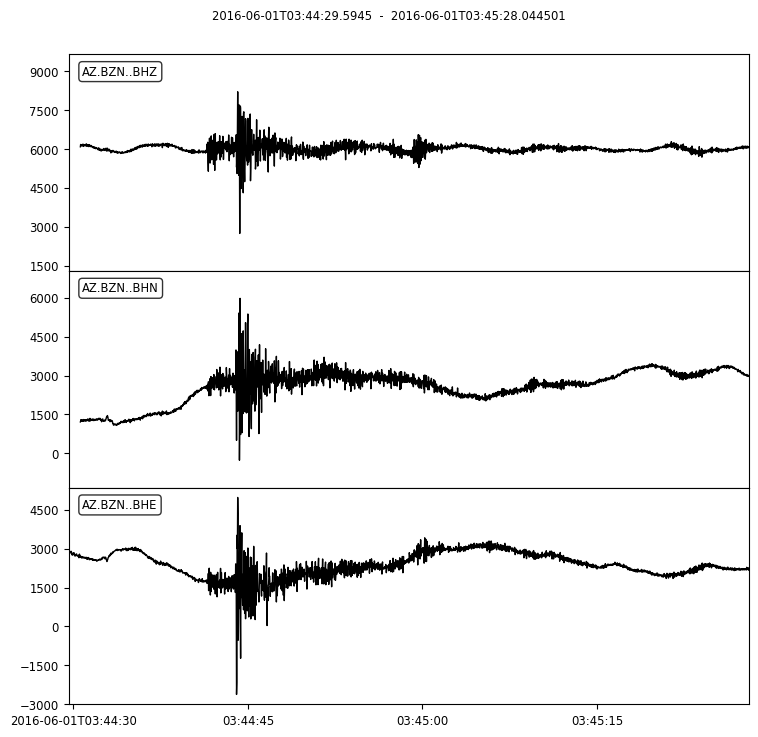

In [6]:
### Plot Traces

# First three traces
print('\nPlotting Traces')
st[0:3].plot(equal_scale='False')